In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
movie_data = pd.read_csv('C:/Users/pc/Desktop/IMDB_india_Movie/IMDb Movies India.csv', encoding='latin-1')

In [3]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


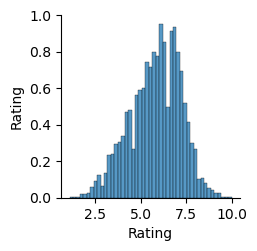

In [4]:
movie_data.describe()
sns.pairplot(movie_data)
plt.show()

In [5]:
movie_data.shape

(15509, 10)

In [6]:
movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
movie_data.dropna(axis=0)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [8]:
movie_data.duplicated().any()

True

In [10]:
data =movie_data.drop_duplicates()
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
movie_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [17]:
movie_data['Year'] = movie_data['Year'].str.extract('(\d+)').astype(float)

# Remplacement des valeurs non numériques par la médiane
median_year = movie_data['Year'].median()
movie_data['Year'].fillna(median_year, inplace=True)

In [18]:
movie_data["Duration"] = movie_data['Duration'].str.extract('(\d+)').astype(float)
median_duration = movie_data['Duration'].median()
movie_data['Duration'].fillna(median_duration , inplace=True)

In [19]:
movie_data['Rating'] = pd.to_numeric(movie_data['Rating'], errors='coerce')  # Convertir en numérique
median_rating = movie_data['Rating'].median()
movie_data['Rating'].fillna(median_rating, inplace=True)

In [20]:
movie_data['Votes'] = pd.to_numeric(movie_data['Votes'], errors='coerce')  # Convertir en numérique
median_rating = movie_data['Votes'].median()
movie_data['Votes'].fillna(median_rating, inplace=True)

In [22]:
movie_data['Votes'] = pd.to_numeric(movie_data['Votes'], errors='coerce')
movie_data.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
2009.0    128.607143
2008.0    125.809249
2013.0    123.067460
2010.0    120.774359
2006.0    114.906077
             ...    
1944.0     31.833333
1950.0     31.612245
1945.0     31.070423
1943.0     30.894737
1917.0     22.000000
Name: Votes, Length: 102, dtype: float64

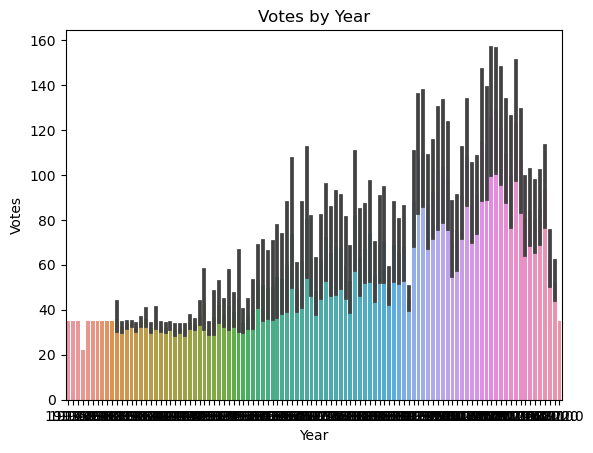

In [26]:
sns.barplot(x='Year',y='Votes',data =movie_data)
plt.title("Votes by Year")
plt.show()

In [28]:
movie_data.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Saif Ali Sayeed     10.0
Sriram Raja          9.7
Bobby Kumar          9.6
Munni Pankaj         9.4
Arvind Pratap        9.4
                    ... 
Vishwas Patil        2.3
Umesh Ghadge         1.9
Sumeer Sabharwal     1.9
Stanley D'Costa      1.8
Pramod Mandloi       1.7
Name: Rating, Length: 5938, dtype: float64

In [29]:
movie_data['Year'].value_counts()

1991.0    773
2019.0    410
2021.0    392
2018.0    381
2017.0    360
         ... 
1917.0      1
1913.0      1
1926.0      1
1914.0      1
1924.0      1
Name: Year, Length: 102, dtype: int64

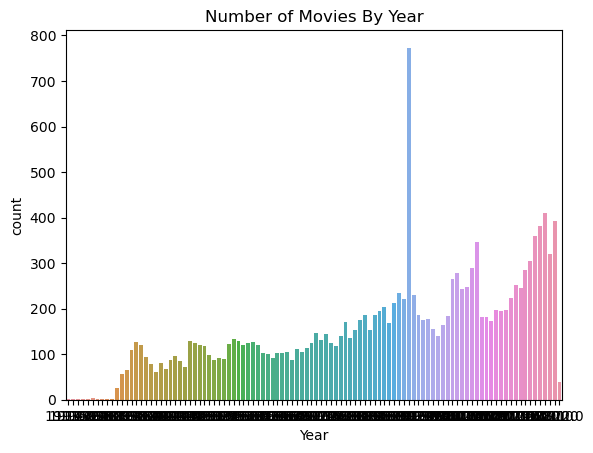

In [40]:
sns.countplot(x='Year',data =movie_data)
plt.title("Number of Movies By Year")
plt.show()

In [42]:
top10_len_Rat=movie_data.nlargest(10,'Rating')[['Name','Rating','Director']].set_index('Name')

In [43]:
top10_len_Rat

,Rating,Director
Name,,
Love Qubool Hai,10.0,Saif Ali Sayeed
Half Songs,9.7,Sriram Raja
Breed,9.6,Bobby Kumar
Gho Gho Rani,9.4,Munni Pankaj
June,9.4,Suhrud Godbole
Ram-Path,9.4,Ashish Dubey
The Reluctant Crime,9.4,Arvind Pratap
Ashok Vatika,9.3,Rahul Mallick
Baikunth,9.3,Vishwa Bhanu


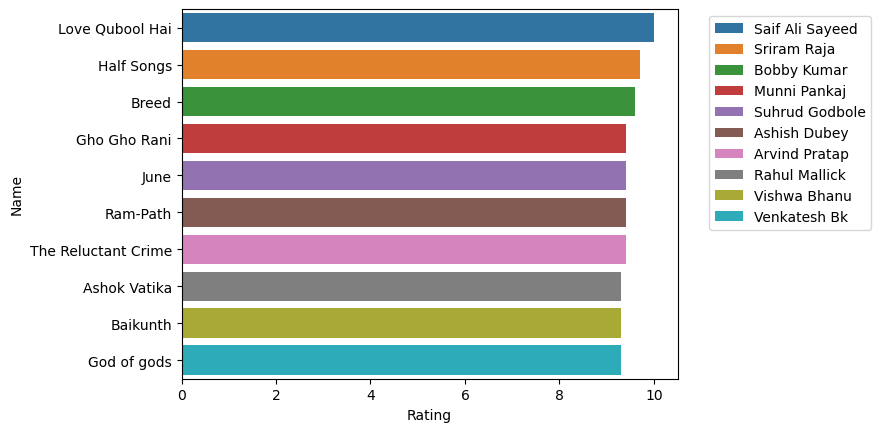

In [48]:
sns.barplot(x='Rating',y=top10_len_Rat.index,data=top10_len_Rat,hue='Director',dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.show()

In [49]:
movie_data.groupby('Year')['Rating'].mean().sort_values(ascending=False)

Year
1917.0    6.700000
1974.0    6.342759
1967.0    6.339773
1950.0    6.335714
1957.0    6.330833
            ...   
2006.0    5.488950
1995.0    5.484181
1994.0    5.480682
1998.0    5.477301
2008.0    5.441040
Name: Rating, Length: 102, dtype: float64

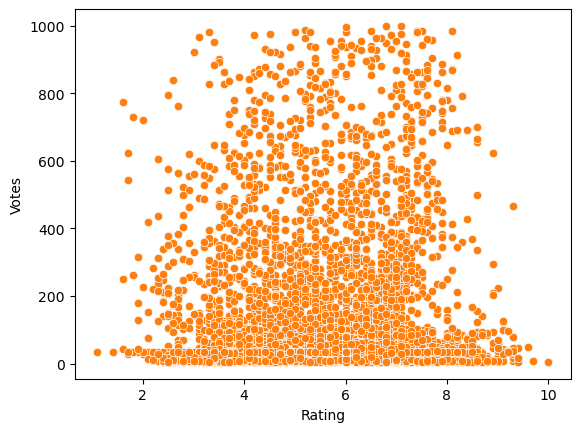

In [51]:
sns.scatterplot(x="Rating",y="Votes",data=movie_data)
plt.show()

In [52]:
def rating(rating):
    if rating >= 7.0:
        return "Excellent"
    elif rating >= 6.0:
        return "Good"
    else:
        return "Average"

In [53]:
movie_data['rating_cat']=movie_data['Rating'].apply(rating)

In [55]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,rating_cat
0,,1991.0,131.0,Drama,6.0,35.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Good
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Excellent
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.0,35.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Good
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Average
4,...And Once Again,2010.0,105.0,Drama,6.0,35.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Good


In [60]:
list1 = []
for val in movie_data['Genre']:
    if isinstance(val, str):  
        list1.append(val.split(','))
    else:
        list1.append([])  


In [61]:
list1

[['Drama'],
 ['Drama'],
 ['Drama', ' Musical'],
 ['Comedy', ' Romance'],
 ['Drama'],
 ['Comedy', ' Drama', ' Musical'],
 ['Drama', ' Romance', ' War'],
 ['Documentary'],
 ['Horror', ' Mystery', ' Thriller'],
 ['Action', ' Crime', ' Thriller'],
 ['Drama'],
 ['Horror'],
 ['Horror', ' Romance', ' Thriller'],
 ['Comedy', ' Drama', ' Romance'],
 ['Thriller'],
 ['Comedy', ' Drama'],
 [],
 ['Comedy', ' Drama', ' Fantasy'],
 ['Comedy', ' Drama', ' Romance'],
 [],
 ['Comedy', ' Drama', ' Family'],
 ['Crime', ' Drama', ' Mystery'],
 ['Horror', ' Thriller'],
 ['Biography'],
 ['Documentary'],
 ['Comedy', ' Horror'],
 ['Action'],
 ['Drama'],
 ['Drama', ' Horror', ' Mystery'],
 ['Comedy'],
 ['Drama'],
 [],
 ['Drama'],
 ['Action', ' Thriller'],
 ['Action'],
 ['Drama', ' History'],
 ['Drama'],
 ['Drama', ' History', ' Sport'],
 ['Horror', ' Mystery', ' Romance'],
 ['Horror', ' Mystery'],
 ['Drama', ' Horror', ' Romance'],
 ['Horror', ' Mystery', ' Romance'],
 ['Action', ' Drama', ' History'],
 ['Actio

In [62]:
one_d=[]
for item in list1:
    for item1 in item:
        one_d.append(item1)

In [63]:
one_d

['Drama',
 'Drama',
 'Drama',
 ' Musical',
 'Comedy',
 ' Romance',
 'Drama',
 'Comedy',
 ' Drama',
 ' Musical',
 'Drama',
 ' Romance',
 ' War',
 'Documentary',
 'Horror',
 ' Mystery',
 ' Thriller',
 'Action',
 ' Crime',
 ' Thriller',
 'Drama',
 'Horror',
 'Horror',
 ' Romance',
 ' Thriller',
 'Comedy',
 ' Drama',
 ' Romance',
 'Thriller',
 'Comedy',
 ' Drama',
 'Comedy',
 ' Drama',
 ' Fantasy',
 'Comedy',
 ' Drama',
 ' Romance',
 'Comedy',
 ' Drama',
 ' Family',
 'Crime',
 ' Drama',
 ' Mystery',
 'Horror',
 ' Thriller',
 'Biography',
 'Documentary',
 'Comedy',
 ' Horror',
 'Action',
 'Drama',
 'Drama',
 ' Horror',
 ' Mystery',
 'Comedy',
 'Drama',
 'Drama',
 'Action',
 ' Thriller',
 'Action',
 'Drama',
 ' History',
 'Drama',
 'Drama',
 ' History',
 ' Sport',
 'Horror',
 ' Mystery',
 ' Romance',
 'Horror',
 ' Mystery',
 'Drama',
 ' Horror',
 ' Romance',
 'Horror',
 ' Mystery',
 ' Romance',
 'Action',
 ' Drama',
 ' History',
 'Action',
 ' Drama',
 ' War',
 'Thriller',
 'Comedy',
 'Drama'

In [99]:
uni_list=[]
for val in one_d:
    if val not in uni_list:
        uni_list.append(val)

In [100]:
uni_list

['Drama',
 ' Musical',
 'Comedy',
 ' Romance',
 ' Drama',
 ' War',
 'Documentary',
 'Horror',
 ' Mystery',
 ' Thriller',
 'Action',
 ' Crime',
 'Thriller',
 ' Fantasy',
 ' Family',
 'Crime',
 'Biography',
 ' Horror',
 ' History',
 ' Sport',
 'Adventure',
 ' Sci-Fi',
 'War',
 'Sport',
 ' Comedy',
 ' Adventure',
 ' Biography',
 'Mystery',
 'Musical',
 ' Music',
 'Romance',
 'Family',
 'Fantasy',
 'Sci-Fi',
 'Animation',
 'Music',
 'History',
 ' Action',
 ' News',
 ' Western',
 ' Reality-TV',
 'Reality-TV',
 ' Short']

In [72]:
columns_to_fill = ['Year', 'Duration', 'Rating', 'Votes']
for col in columns_to_fill:
    movie_data[col].fillna(movie_data[col].median(), inplace=True)


In [73]:
genre_dummies = movie_data['Genre'].str.get_dummies(',')
movie_data = pd.concat([movie_data, genre_dummies], axis=1)


In [74]:
columns_to_drop = ['Name', 'Actor 1', 'Actor 2', 'Actor 3']
movie_data.drop(columns=columns_to_drop, inplace=True)


In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = ['Year', 'Duration', 'Rating', 'Votes']
movie_data[numeric_columns] = scaler.fit_transform(movie_data[numeric_columns])


In [85]:
cat_columns = ['Director', 'Genre','rating_cat']  
movie_data_encoded = pd.get_dummies(movie_data, columns=cat_columns)


In [86]:
X = movie_data_encoded.drop('Rating', axis=1)
y = movie_data_encoded['Rating']


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [103]:

y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² : {r2}")
print(f"MSE : {mse}")


R² : -1.260091628440684e+20
MSE : 1.2489930401110827e+20


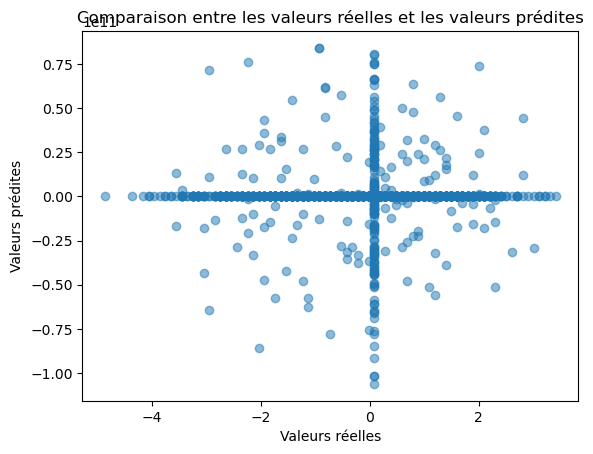

In [104]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Comparaison entre les valeurs réelles et les valeurs prédites')
plt.show()
